In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import tensorflow 


In [3]:
tumor='/content/drive/MyDrive/Brain Tumor'
healthy='/content/drive/MyDrive/Healthy'

# Image preprocessing

  0%|          | 0/2513 [00:00<?, ?it/s]

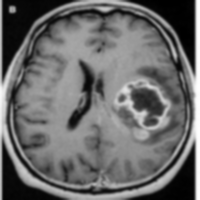

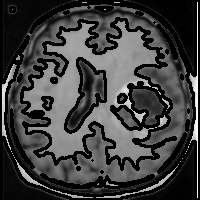

  0%|          | 1/2513 [00:00<15:17,  2.74it/s]

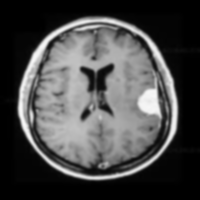

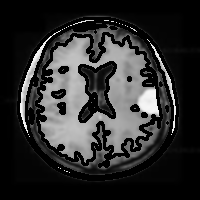

  0%|          | 2/2513 [00:00<15:21,  2.73it/s]

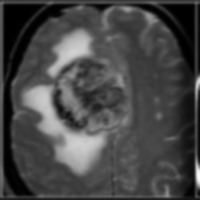

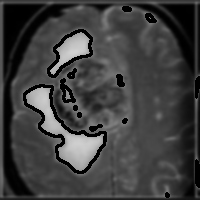

  0%|          | 2/2513 [00:00<18:31,  2.26it/s]


*********************************************************************************************************************************************


  0%|          | 0/2087 [00:00<?, ?it/s]

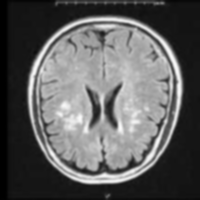

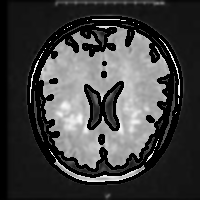

  0%|          | 1/2087 [00:00<08:19,  4.18it/s]

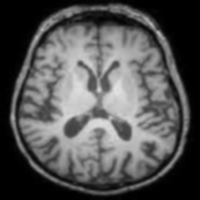

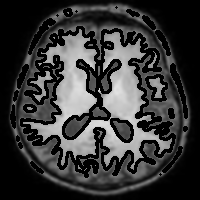

  0%|          | 2/2087 [00:00<07:14,  4.80it/s]

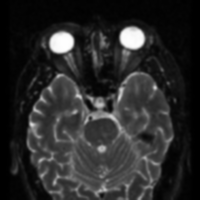

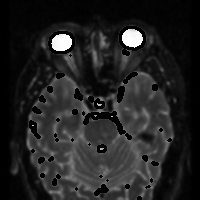

  0%|          | 2/2087 [00:00<11:49,  2.94it/s]


In [4]:
import cv2
from google.colab.patches import cv2_imshow
import os
from tqdm import tqdm
ctr=0
for img in tqdm(os.listdir(tumor)):
    image = cv2.imread(os.path.join(tumor,img),1)
    f = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    f=cv2.resize(f,(200,200))
    f=cv2.GaussianBlur(f,(5,5),0)
    cv2_imshow(f)
    _,th1=cv2.threshold(f,127,255,cv2.THRESH_TOZERO)
    #im=cv2.Canny(th1,100,200)
    #im=cv2.Laplacian(th1,cv2.CV_64F,ksize=3)
    contours,h_=cv2.findContours(th1,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
    cv2.drawContours(f,contours,-1,(0,0,0),2)#-1 ->to draw all contours
    cv2_imshow(f)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    ctr=ctr+1
    if ctr==3:
        break
print("*********************************************************************************************************************************************")      
ctr=0    
for img in tqdm(os.listdir(healthy)):
    f = cv2.imread(os.path.join(healthy,img))
    f = cv2.cvtColor(f,cv2.COLOR_BGR2GRAY)
    f = cv2.resize(f,(200,200))
    f=cv2.GaussianBlur(f,(5,5),0)
    cv2_imshow(f)
    _,th1=cv2.threshold(f,127,255,cv2.THRESH_TOZERO)
    #im=cv2.Canny(th1,100,200)
    #im=cv2.Laplacian(th1,cv2.CV_64F,ksize=3)
    countours,h_=cv2.findContours(th1,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
    cv2.drawContours(f,countours,-1,(0,0,0),2)
    cv2_imshow(f)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    ctr=ctr+1
    if ctr==3:
        break
    

In [5]:
import cv2
from google.colab.patches import cv2_imshow
import os
features = []
from tqdm import tqdm
for img in tqdm(os.listdir(tumor)):
    image = cv2.imread(os.path.join(tumor,img))
    imgg = cv2.resize(image,(200,200))
    features.append(imgg)
for img in tqdm(os.listdir(healthy)):
    image = cv2.imread(os.path.join(healthy,img))
    imgg = cv2.resize(image,(200,200))
    features.append(imgg)


100%|██████████| 2087/2087 [00:25<00:00, 82.56it/s] 


In [6]:
labels = []
from tqdm import tqdm

for img in tqdm(os.listdir(tumor)):
    labels.append(0)

for img in tqdm(os.listdir(healthy)):
    labels.append(1)

100%|██████████| 2087/2087 [00:00<00:00, 1327697.93it/s]


In [7]:
import numpy as np
X = np.array(features)
X[0].shape

(200, 200, 3)

In [8]:
Y = np.array(labels)
Y.shape

(4600,)

In [9]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,train_size=0.8,shuffle=True)
print(xtest.shape)
print(xtrain.shape)

(920, 200, 200, 3)
(3680, 200, 200, 3)


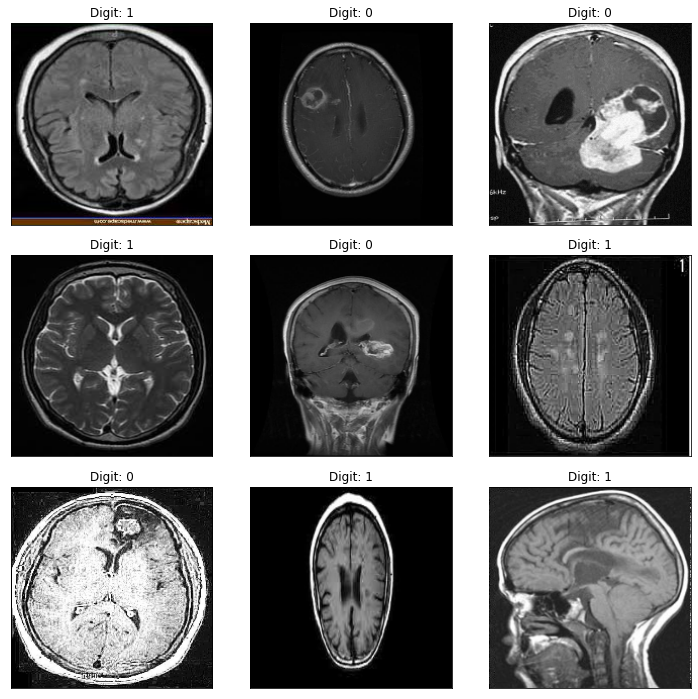

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(xtrain[i],cmap='gray')
  plt.title("Digit: {}".format(ytrain[i]))
  plt.xticks([])
  plt.yticks([])

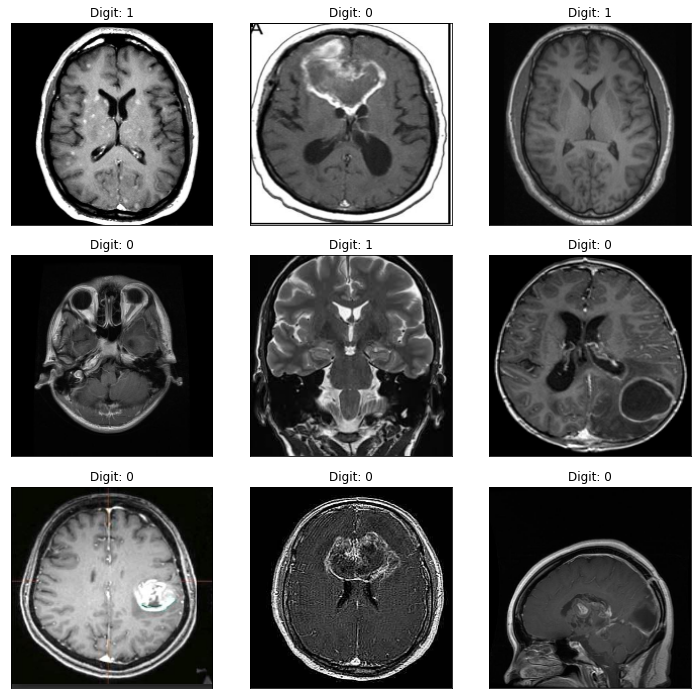

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(xtest[i],cmap='gray')
  plt.title("Digit: {}".format(ytest[i]))
  plt.xticks([])
  plt.yticks([])

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from keras.layers.normalization import batch_normalization

In [13]:
model=Sequential()

In [14]:
a=200

In [15]:

model.add(tensorflow.keras.layers.Conv2D(200,kernel_size=(3,3),activation='relu',input_shape=(a,a,3)))
model.add(tensorflow.keras.layers.Conv2D(150,kernel_size=(3,3),activation='relu'))
model.add(tensorflow.keras.layers.MaxPool2D(4,4))

In [16]:
model.add(tensorflow.keras.layers.Flatten())

In [17]:
model.add(Dense(128))
model.add(batch_normalization.BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.4))

In [18]:
model.add(Dense(128))
model.add(batch_normalization.BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.4))

In [19]:
model.add(Dense(1))

In [20]:
model.add(Activation('sigmoid'))

In [21]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [22]:
history=model.fit(xtrain,ytrain,batch_size=30,
                  verbose=1,
                  validation_data=(xtest,ytest),epochs=8)

Epoch 1/8
123/123 [==============================] - 71s 469ms/step - loss: 0.5049 - accuracy: 0.7549 - val_loss: 0.3032 - val_accuracy: 0.8978
Epoch 2/8
123/123 [==============================] - 57s 462ms/step - loss: 0.2211 - accuracy: 0.9155 - val_loss: 0.2285 - val_accuracy: 0.9109
Epoch 3/8
123/123 [==============================] - 56s 455ms/step - loss: 0.1397 - accuracy: 0.9546 - val_loss: 0.1344 - val_accuracy: 0.9565
Epoch 4/8
123/123 [==============================] - 56s 455ms/step - loss: 0.0840 - accuracy: 0.9731 - val_loss: 0.1649 - val_accuracy: 0.9424
Epoch 5/8
123/123 [==============================] - 56s 456ms/step - loss: 0.0675 - accuracy: 0.9807 - val_loss: 0.1239 - val_accuracy: 0.9598
Epoch 6/8
123/123 [==============================] - 56s 455ms/step - loss: 0.0415 - accuracy: 0.9875 - val_loss: 0.1005 - val_accuracy: 0.9739
Epoch 7/8
123/123 [==============================] - 56s 454ms/step - loss: 0.0226 - accuracy: 0.9937 - val_loss: 0.1059 - val_accuracy:

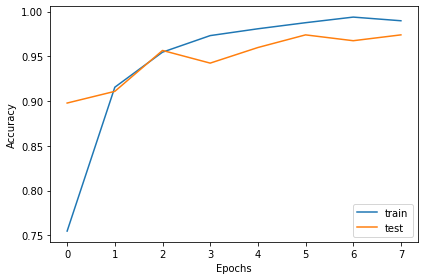

In [23]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(['train','test'],loc='lower right')
plt.tight_layout()

In [24]:
y_pred=model.predict(xtest)

29/29 [==============================] - 8s 205ms/step


In [25]:
val_loss,acc=model.evaluate(xtest,ytest)

29/29 [==============================] - 4s 153ms/step - loss: 0.1060 - accuracy: 0.9739
